In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # My fix for 'NameError: name 'url' is not defined' error
    # Starting URL for Weather Map API Call.
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | luanda
Processing Record 3 of Set 1 | keetmanshoop
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | carnarvon
Processing Record 6 of Set 1 | boysun
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | saleaula
City not found. Skipping...
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | kirkuk
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | yacuiba
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | attawapiskat
Cit

Processing Record 42 of Set 4 | soyo
Processing Record 43 of Set 4 | marawi
Processing Record 44 of Set 4 | lazaro cardenas
Processing Record 45 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | ushumun
Processing Record 48 of Set 4 | bafoulabe
Processing Record 49 of Set 4 | roma
Processing Record 50 of Set 4 | vanavara
Processing Record 1 of Set 5 | camocim
Processing Record 2 of Set 5 | antofagasta
Processing Record 3 of Set 5 | porto novo
Processing Record 4 of Set 5 | nosy varika
Processing Record 5 of Set 5 | porto santo
Processing Record 6 of Set 5 | lavrentiya
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | champerico
Processing Record 9 of Set 5 | tasiilaq
Processing Record 10 of Set 5 | dunedin
Processing Record 11 of Set 5 | deputatskiy
Processing Record 12 of Set 5 | magadan
Processing Record 13 of Set 5 | husavik
Processing Record 14 of Set 5 | ust-kamchatsk
City not found. Skipping...
Pro

Processing Record 28 of Set 8 | coihaique
Processing Record 29 of Set 8 | karratha
Processing Record 30 of Set 8 | arrifes
Processing Record 31 of Set 8 | port blair
Processing Record 32 of Set 8 | novi pazar
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | norman wells
Processing Record 35 of Set 8 | flagstaff
Processing Record 36 of Set 8 | helong
Processing Record 37 of Set 8 | college
Processing Record 38 of Set 8 | mikuni
Processing Record 39 of Set 8 | qui nhon
Processing Record 40 of Set 8 | warwick
Processing Record 41 of Set 8 | giyani
Processing Record 42 of Set 8 | wonthaggi
Processing Record 43 of Set 8 | jasper
Processing Record 44 of Set 8 | san jeronimo
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | natal
Processing Record 47 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 48 of Set 8 | twentynine palms
Processing Record 49 of Set 8 | caravelas
Processing Record 50 of Set 8 | torit
Processing Record

Processing Record 11 of Set 12 | bima
Processing Record 12 of Set 12 | faro
Processing Record 13 of Set 12 | raudeberg
Processing Record 14 of Set 12 | tarpon springs
Processing Record 15 of Set 12 | samusu
City not found. Skipping...
Processing Record 16 of Set 12 | kahului
Processing Record 17 of Set 12 | naugarzan
City not found. Skipping...
Processing Record 18 of Set 12 | camaqua
Processing Record 19 of Set 12 | saint-leu
Processing Record 20 of Set 12 | feni
Processing Record 21 of Set 12 | dudinka
Processing Record 22 of Set 12 | el jicaro
Processing Record 23 of Set 12 | alekseyevsk
Processing Record 24 of Set 12 | valkeala
Processing Record 25 of Set 12 | maryville
Processing Record 26 of Set 12 | ozgon
City not found. Skipping...
Processing Record 27 of Set 12 | dahuk
Processing Record 28 of Set 12 | brasileia
Processing Record 29 of Set 12 | fuengirola
Processing Record 30 of Set 12 | rengo
Processing Record 31 of Set 12 | fortuna
Processing Record 32 of Set 12 | sturgis
Pro

In [9]:
len(city_data)

539

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,30.00,86,90,10.60,US,2020-12-29 01:09:28
1,Luanda,-8.84,13.23,77.00,83,75,2.24,AO,2020-12-29 01:12:41
2,Keetmanshoop,-26.58,18.13,74.39,33,9,10.63,NA,2020-12-29 01:13:34
3,Saskylakh,71.92,114.08,-15.29,87,100,22.44,RU,2020-12-29 01:13:34
4,Carnarvon,-24.87,113.63,80.60,83,90,3.36,AU,2020-12-29 01:13:34
5,Boysun,38.21,67.20,22.41,77,0,4.34,UZ,2020-12-29 01:13:34
6,Vaini,-21.20,-175.20,84.20,74,75,4.70,TO,2020-12-29 01:13:35
7,Bengkulu,-3.80,102.27,75.87,84,100,6.76,ID,2020-12-29 01:13:35
8,Hermanus,-34.42,19.23,64.99,83,98,5.77,ZA,2020-12-29 01:13:35
9,Cape Town,-33.93,18.42,64.99,77,40,6.93,ZA,2020-12-29 01:10:13


In [11]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
# Assign same DataFrame with new column order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2020-12-29 01:09:28,42.10,-79.24,30.00,86,90,10.60
1,Luanda,AO,2020-12-29 01:12:41,-8.84,13.23,77.00,83,75,2.24
2,Keetmanshoop,NA,2020-12-29 01:13:34,-26.58,18.13,74.39,33,9,10.63
3,Saskylakh,RU,2020-12-29 01:13:34,71.92,114.08,-15.29,87,100,22.44
4,Carnarvon,AU,2020-12-29 01:13:34,-24.87,113.63,80.60,83,90,3.36
...,...,...,...,...,...,...,...,...,...
534,Nishihara,JP,2020-12-29 01:15:58,26.18,127.76,73.40,73,75,5.82
535,Bayan,CN,2020-12-29 01:15:58,46.08,127.40,-13.34,87,0,7.72
536,Santos Dumont,BR,2020-12-29 01:15:58,-21.46,-43.55,65.55,95,100,2.37
537,Mitchell,US,2020-12-29 01:15:58,43.71,-98.03,21.20,79,1,3.36


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

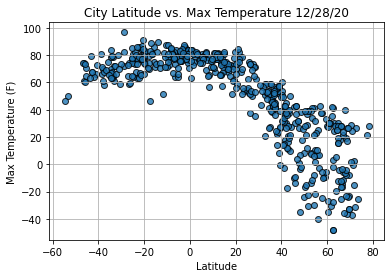

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


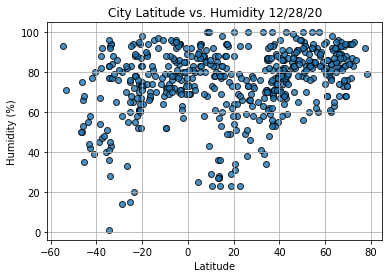

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

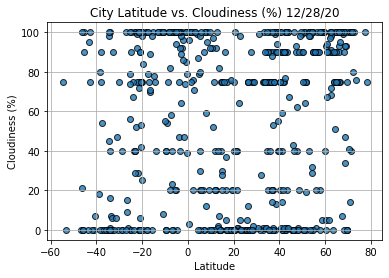

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

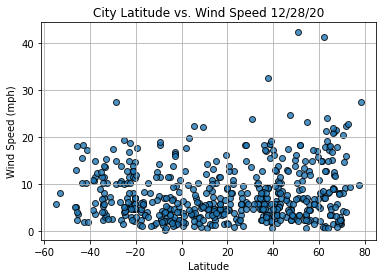

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()